In [2]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [3]:
df=pd.read_csv("../data_Cs137/20210715_173047/20210715_173047_0.csv", index_col=0)

In [4]:
df

TBP:67641  TBP:81803  TBP:80956  TBP:82806  TBP:68766  TBP:67628  \
0            137        137        137        137        137        137   
1            137        136        136        136        136        136   
2            136        137        136        137        137        136   
3            136        136        136        136        136        136   
4            137        136        137        137        137        137   
...          ...        ...        ...        ...        ...        ...   
65529        136        136        136        136        136        136   
65530        137        137        137        137        137        137   
65531        136        137        136        136        136        136   
65532        137        136        137        136        137        137   
65533        136        136        136        136        136        135   

       TBP:71328  TBP:66152  TBP:67563  TBP:66589  ...  TBP:76694  TBP:67247  \
0            137        137        137        137  ...        136        137   
1            136        136        136        135  ...        136        135   
2            136        137        137        137  ...        137        137   
3            136        137        136        135  ...        136        136   
4            137        137        137        137  ...        137        138   
...          ...        ...        ...        ...  ...        ...        ...   
65529        136        136        136        136  ...        136        136   
65530        137        136        136        137  ...        137        137   
65531        136        136        136        136  ...        136        136   
65532        135        136        137        137  ...        137        137   
65533        135        135        136        136  ...        136        137   

       TBP:69111  TBP:70392  TBP:71145  TBP:78225  TBP:74130  TBP:70113  \
0            137        137        137        136        136        137   
1            136        136        136        136        137        136   
2            137        137        137        136        137        137   
3            136        136        136        136        136        136   
4            138        137        137        136        137        137   
...          ...        ...        ...        ...        ...        ...   
65529        136        136        136        136        137        137   
65530        137        136        136        136        136        137   
65531        136        136        136        136        136        136   
65532        129        137        137        136        137        137   
65533        128        137        136        136        136        136   

       TBP:69657  TBP:80324  
0            137        137  
1            136        136  
2            137        137  
3            136        137  
4            137        138  
...          ...        ...  
65529        136        136  
65530        137        136  
65531        136        135  
65532        134        137  
65533        133        136  

[65534 rows x 4007 columns]

In [5]:
df2=df.iloc[:1500].copy()
df2=(df2-np.mean(df2))/np.std(df2)
df2

TBP:67641  TBP:81803  TBP:80956  TBP:82806  TBP:68766  TBP:67628  \
0      0.776402   0.658265   0.860364   0.772113   0.780736   0.934313   
1      0.776402   0.358781   0.488127  -0.138398   0.486563   0.702780   
2     -0.186876   0.658265   0.488127   0.772113   0.780736   0.702780   
3     -0.186876   0.358781   0.488127  -0.138398   0.486563   0.702780   
4      0.776402   0.358781   0.860364   0.772113   0.780736   0.934313   
...         ...        ...        ...        ...        ...        ...   
1495  -0.186876   0.059298   0.488127  -0.138398   0.486563   0.702780   
1496   0.776402   0.658265   0.860364  -0.138398   0.780736   0.702780   
1497  -0.186876   0.358781   0.488127  -0.138398   0.192389   0.702780   
1498   0.776402   0.658265   0.488127  -0.138398   0.780736   0.934313   
1499  -0.186876   0.358781   0.488127  -0.138398   0.486563   0.471247   

      TBP:71328  TBP:66152  TBP:67563  TBP:66589  ...  TBP:76694  TBP:67247  \
0      0.783930   0.745040   0.801194   0.668802  ...   0.410575   0.843562   
1      0.472187   0.252723   0.492330   0.115616  ...   0.410575   0.058366   
2      0.472187   0.745040   0.801194   0.668802  ...   0.645458   0.843562   
3      0.472187   0.745040   0.492330   0.115616  ...   0.410575   0.450964   
4      0.783930   0.745040   0.801194   0.668802  ...   0.645458   1.236160   
...         ...        ...        ...        ...  ...        ...        ...   
1495   0.472187   0.252723   0.492330   0.115616  ...   0.410575   0.450964   
1496   0.783930   0.745040   0.492330   0.392209  ...   0.645458   0.843562   
1497   0.472187   0.252723   0.492330   0.115616  ...   0.175692   0.450964   
1498   0.783930   0.745040   0.492330   0.392209  ...   0.410575   0.843562   
1499   0.472187   0.252723   0.492330   0.115616  ...   0.410575   0.450964   

      TBP:69111  TBP:70392  TBP:71145  TBP:78225  TBP:74130  TBP:70113  \
0      0.816536   0.797379   0.802056   0.448210   0.349911   0.774312   
1      0.349054  -0.472333   0.444421   0.448210   0.690291   0.291574   
2      0.816536   0.797379   0.802056   0.448210   0.690291   0.774312   
3      0.349054  -0.472333   0.444421   0.448210   0.349911   0.291574   
4      1.284019   0.797379   0.802056   0.448210   0.690291   0.774312   
...         ...        ...        ...        ...        ...        ...   
1495   0.349054  -0.472333   0.444421  -3.928402   0.349911   0.291574   
1496   0.816536   0.797379   0.802056  -2.918415   0.690291   0.774312   
1497   0.349054  -0.472333   0.444421  -2.245090   0.349911   0.291574   
1498   0.816536   0.797379   0.444421  -2.245090   0.690291   0.774312   
1499   0.349054  -0.472333   0.444421  -2.581752   0.349911   0.291574   

      TBP:69657  TBP:80324  
0      0.895969   0.634678  
1      0.613744   0.294550  
2      0.895969   0.634678  
3      0.613744   0.634678  
4      0.895969   0.974805  
...         ...        ...  
1495  -0.515154   0.294550  
1496  -1.361827   0.294550  
1497  -1.644052   0.294550  
1498  -0.232929   0.634678  
1499  -0.515154   0.294550  

[1500 rows x 4007 columns]

<IPython.core.display.Javascript object>


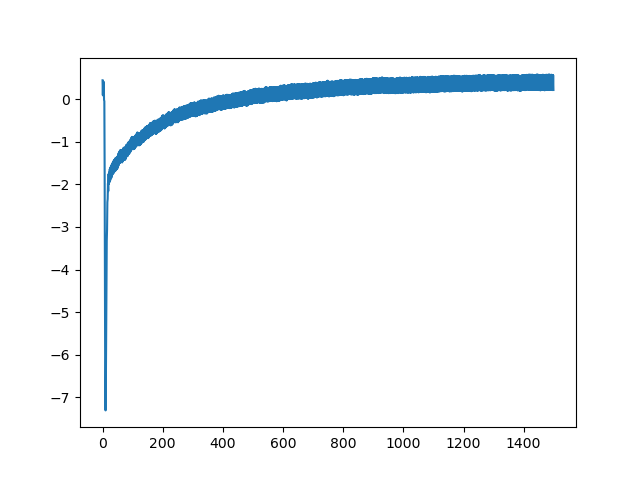

In [6]:
%matplotlib notebook
mod=np.mean(df2.T)
plt.plot(mod)

In [9]:
mod.to_csv("/home/ivan/Gitlab/iaea-pmt/FirCoefficients_Cs137.csv")

# FIR Integrated

In [6]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

<IPython.core.display.Javascript object>


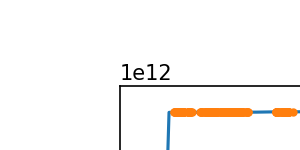

In [18]:
thr=100000
pkh=10000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    intg=np.convolve(fir,np.full(1000,1))
    peak=pkdetect(intg, thr, pkh)
    pkamp=np.append(pkamp,intg[peak])
plt.plot(intg)
plt.plot(peak,intg[peak],".")
# sns.histplot(data=pkamp, kde=True)

<IPython.core.display.Javascript object>


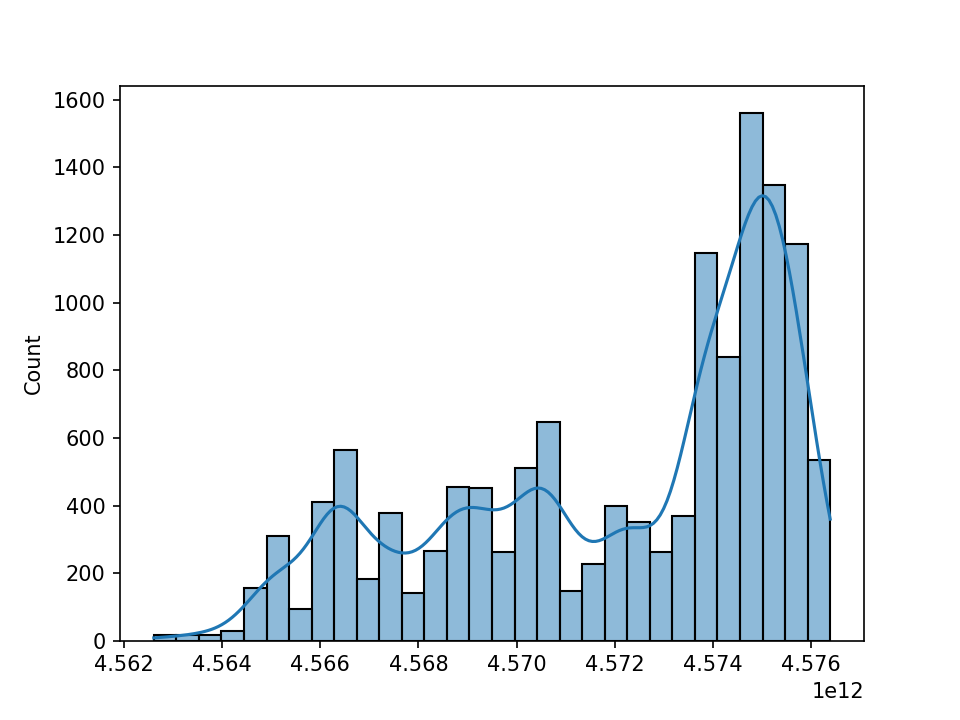

<AxesSubplot:ylabel='Count'>

In [17]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Cs137"])
df2.to_csv("../FIR_Integrated_Cs137_mod3.csv")
df2

# Only FIR

<IPython.core.display.Javascript object>


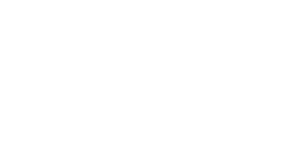

In [10]:
thr=100
pkh=1000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    peak=pkdetect(fir, thr, pkh)
    pkamp=np.append(pkamp,fir[peak])
plt.plot(fir)
plt.plot(peak,fir[peak],".")
# sns.histplot(data=pkamp, kde=True)

<IPython.core.display.Javascript object>


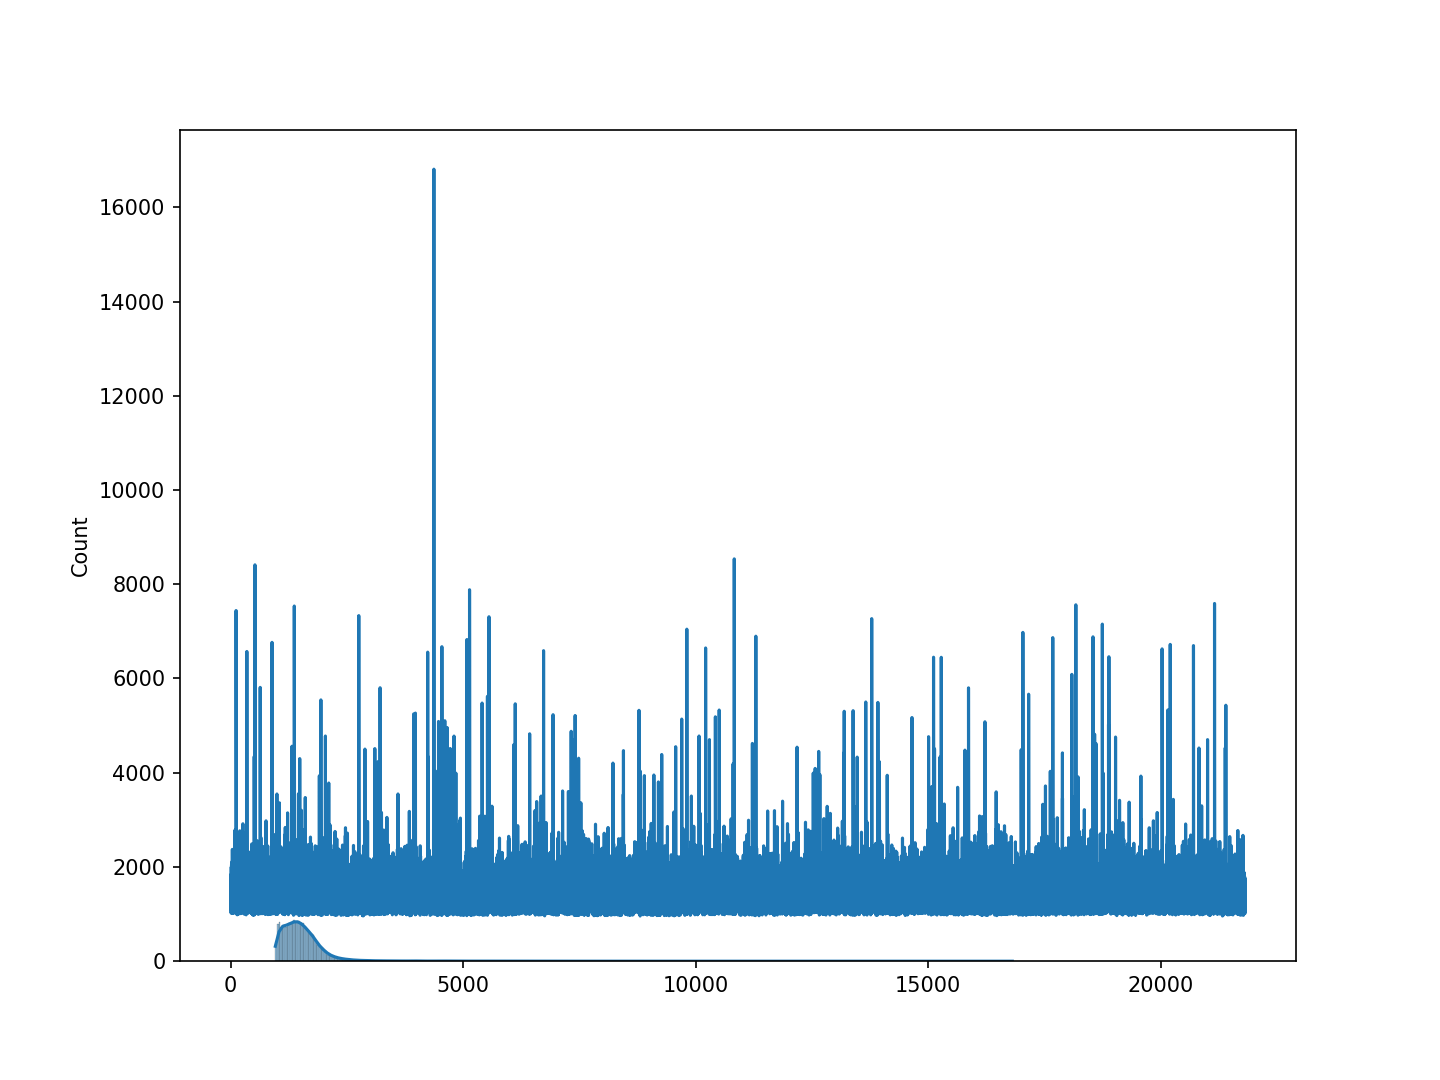

<AxesSubplot:ylabel='Count'>

In [11]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)

In [12]:
df2=pd.DataFrame(pkamp, columns=["Cs137"])
df2.to_csv("../FIR_Cs137_mod3.csv")
df2

Cs137
0      1431.650779
1      1739.722968
2      1777.413206
3      1817.715370
4      1134.005007
...            ...
21815  1571.289373
21816  1358.946125
21817  1260.466060
21818  1651.464727
21819  1490.548934

[21820 rows x 1 columns]